In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-lab2/Lab Session Data.xlsx


A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).  

In [50]:
df = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [51]:
df_cases = df.copy()


In [52]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_ecg', 'preop_pft', 'cormack', 'airway', 'dltubesize', 'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2']


In [53]:
df = df.drop(object_cols,axis=1)


In [54]:
df = df.dropna(how="all")

In [55]:
df = df.astype(float)

In [56]:
y = df['death_inhosp'].values.flatten()
df = df.drop(['death_inhosp','caseid','subjectid','icu_days','casestart','caseend','anestart','aneend','opstart','opend','adm','dis'], axis=1)


In [57]:
x = df.values
df.columns

Index(['age', 'height', 'weight', 'bmi', 'asa', 'emop', 'preop_htn',
       'preop_dm', 'preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt',
       'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast',
       'preop_alt', 'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3',
       'preop_be', 'preop_pao2', 'preop_paco2', 'preop_sao2', 'tubesize',
       'lmasize', 'intraop_ebl', 'intraop_uo', 'intraop_rbc', 'intraop_ffp',
       'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf', 'intraop_mdz',
       'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph',
       'intraop_phe', 'intraop_epi', 'intraop_ca'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.3)

In [59]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imputed_x_train.columns = x_train.columns
imputed_x_test = pd.DataFrame(my_imputer.transform(x_test))
imputed_x_test.columns = x_test.columns

In [60]:
from sklearn.neighbors import KNeighborsClassifier
neigh =KNeighborsClassifier(n_neighbors=3)
neigh.fit(imputed_x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [62]:
cm_y_train = neigh.predict(imputed_x_train)
cm_y_test = neigh.predict(imputed_x_test)
cm_train = confusion_matrix(y_train,cm_y_train)
cm_test = confusion_matrix(y_test,cm_y_test)

In [63]:
precision_train = precision_score(y_train, cm_y_train,average="weighted" )
recall_train = recall_score(y_train, cm_y_train,average="weighted" )
f1_train = f1_score(y_train, cm_y_train,average="weighted" )

In [64]:
precision_train,recall_train,f1_train

(0.9902219037489246, 0.9917244464325654, 0.9885224532435222)

In [65]:
precision_test = precision_score(y_test, cm_y_test, average="weighted")
recall_test = recall_score(y_test, cm_y_test,average="weighted" )
f1_test = f1_score(y_test, cm_y_test, average="weighted")

In [66]:
precision_test,recall_test,f1_test

(0.9858026599163074, 0.9906103286384976, 0.987341176934004)

We can infer the model's learning outcome to be overfit due to high accuracy scores and the class imbalance

A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. 
Analyse the results.


In [67]:
xls = pd.ExcelFile("/kaggle/input/ml-lab2/Lab Session Data.xlsx")
df1 = pd.read_excel(xls,sheet_name=0)
df1=df1.iloc[:,[i for i in range(0,5)]]


In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [69]:
df2 = pd.read_excel(xls,sheet_name=1)

In [70]:
df2.Price

0      2081.85
1      2077.75
2      2068.85
3      2072.95
4      2078.25
        ...   
244    1397.40
245    1400.75
246    1405.10
247    1412.35
248    1363.05
Name: Price, Length: 249, dtype: float64

In [71]:
df2.columns

Index(['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume',
       'Chg%'],
      dtype='object')

In [72]:
df2.Volume = df2.Volume.map(lambda x : float(x[:-1])*1000000 if x[-1] == "M" else float(x[:-1])*1000)

In [73]:
features = ["High","Low","Volume","Chg%"]

In [74]:
X = df2[features]
y = df2["Price"]

In [75]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [76]:
from sklearn.ensemble import RandomForestRegressor
model  =RandomForestRegressor()

In [77]:
model.fit(train_X, train_y)


RandomForestRegressor()

In [78]:
pred = model.predict(val_X)

In [79]:
print("MSE",mean_squared_error(val_y,pred))
print("RMSE",mean_squared_error(val_y,pred,squared=False))
print("MAPE",mean_absolute_percentage_error(val_y,pred))
print("R2",r2_score(val_y,pred))


MSE 183.95972264284453
RMSE 13.563175241913102
MAPE 0.005954605007104973
R2 0.9972820688142676


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot

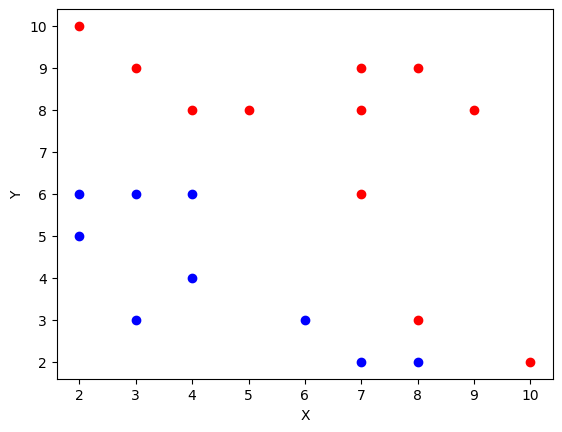

In [80]:
import random
import matplotlib.pyplot as plt

data = [[random.randint(1, 10), random.randint(1, 10)] for i in range(20)]

classes = [0 if x[0] + x[1] <= 10 else 1 for x in data]

class0_data = [data[i] for i in range(len(data)) if classes[i] == 0]
class1_data = [data[i] for i in range(len(data)) if classes[i] == 1]
plt.scatter([x[0] for x in class0_data], [x[1] for x in class0_data], color='blue', label='Class 0')
plt.scatter([x[0] for x in class1_data], [x[1] for x in class1_data], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [81]:
df.weight

0       67.50
1       54.80
2       69.70
3       53.00
4       59.70
        ...  
6383    63.00
6384    62.30
6385    43.25
6386    55.50
6387    51.50
Name: weight, Length: 6388, dtype: float64

A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space.

In [82]:
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = [[random.randint(1, 10), random.randint(1, 10)] for i in range(20)]
classes = [0 if x[0] + x[1] <= 10 else 1 for x in data]


x_values = [i/10 for i in range(0, 101)]
y_values = [i/10 for i in range(0, 101)]

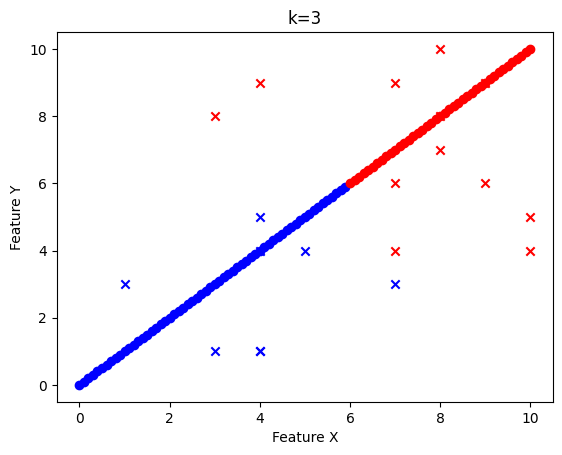

In [83]:
test_data = list(zip(x_values,y_values))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data, classes)


predicted_classes = neigh.predict(test_data)

class0_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 0]
class1_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 1]


plt.scatter([x[0] for x in class0_test], [x[1] for x in class0_test], color='blue', label='Class 0')
plt.scatter([x[0] for x in class1_test], [x[1] for x in class1_test], color='red', label='Class 1')


plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 0], [x[1] for i,x in enumerate(data) if classes[i] == 0], marker='x', color='blue')
plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 1], [x[1] for i,x in enumerate(data) if classes[i] == 1], marker='x', color='red')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title("k=3")
plt.show()

A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

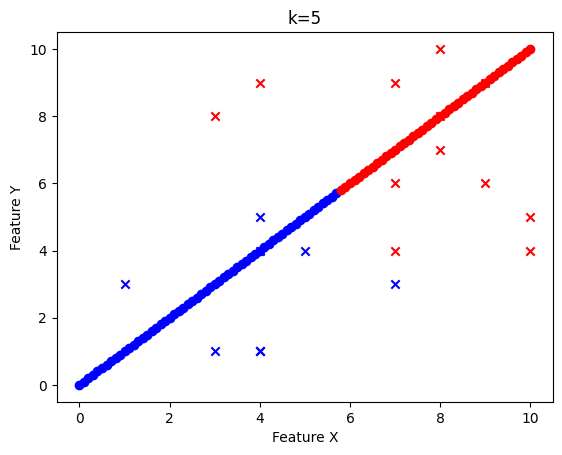

In [84]:
test_data = list(zip(x_values,y_values))

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(data, classes)


predicted_classes = neigh.predict(test_data)

class0_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 0]
class1_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 1]


plt.scatter([x[0] for x in class0_test], [x[1] for x in class0_test], color='blue', label='Class 0')
plt.scatter([x[0] for x in class1_test], [x[1] for x in class1_test], color='red', label='Class 1')


plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 0], [x[1] for i,x in enumerate(data) if classes[i] == 0], marker='x', color='blue')
plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 1], [x[1] for i,x in enumerate(data) if classes[i] == 1], marker='x', color='red')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title("k=5")
plt.show()

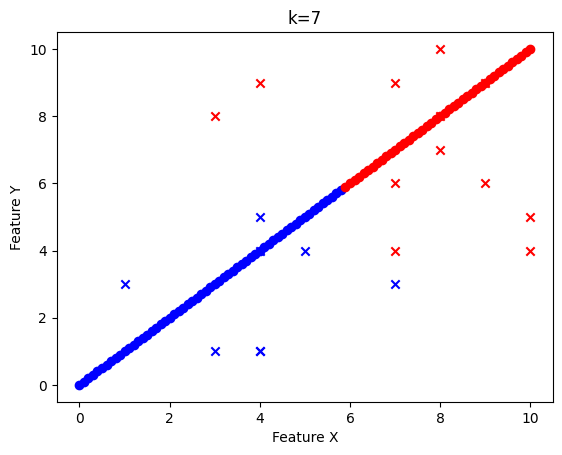

In [85]:
test_data = list(zip(x_values,y_values))

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(data, classes)


predicted_classes = neigh.predict(test_data)

class0_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 0]
class1_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 1]


plt.scatter([x[0] for x in class0_test], [x[1] for x in class0_test], color='blue', label='Class 0')
plt.scatter([x[0] for x in class1_test], [x[1] for x in class1_test], color='red', label='Class 1')


plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 0], [x[1] for i,x in enumerate(data) if classes[i] == 0], marker='x', color='blue')
plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 1], [x[1] for i,x in enumerate(data) if classes[i] == 1], marker='x', color='red')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title("k=7")
plt.show()

In [86]:
df_cases = pd.read_csv("https://api.vitaldb.net/cases")

In [87]:
X = df_cases["height"]
y = df_cases["weight"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.5)

A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.

In [89]:
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(X_train.to_list(),X_val.to_list()))
# Checking if overweight using BMI 
classes = [0 if (height/10)**2/weight <=25  else 1 for height,weight in data]

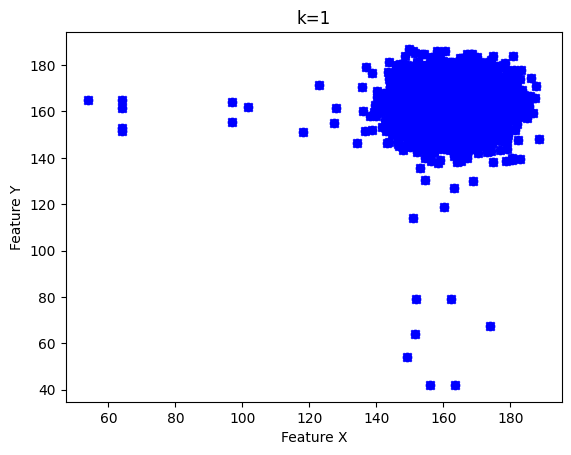

In [90]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(data,classes)
predicted_classes = neigh.predict(list(zip(X_val,y_val)))
test_data = data
class0_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 0]
class1_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 1]


plt.scatter([x[0] for x in class0_test], [x[1] for x in class0_test], color='blue', label='Class 0')
plt.scatter([x[0] for x in class1_test], [x[1] for x in class1_test], color='red', label='Class 1')


plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 0], [x[1] for i,x in enumerate(data) if classes[i] == 0], marker='x', color='blue')
plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 1], [x[1] for i,x in enumerate(data) if classes[i] == 1], marker='x', color='red')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title("k=1")
plt.show()

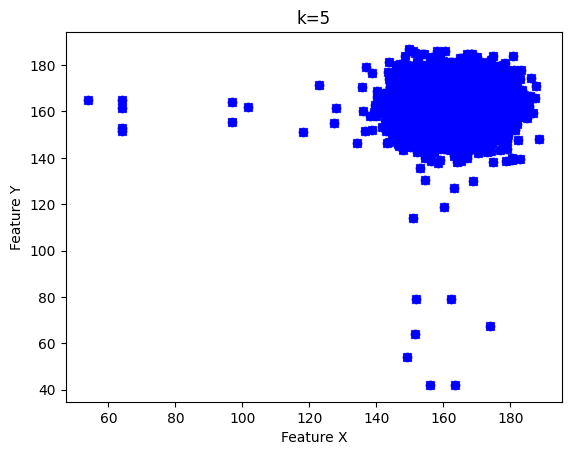

In [91]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(data, classes)


predicted_classes = neigh.predict(test_data)

class0_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 0]
class1_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 1]


plt.scatter([x[0] for x in class0_test], [x[1] for x in class0_test], color='blue', label='Class 0')
plt.scatter([x[0] for x in class1_test], [x[1] for x in class1_test], color='red', label='Class 1')


plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 0], [x[1] for i,x in enumerate(data) if classes[i] == 0], marker='x', color='blue')
plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 1], [x[1] for i,x in enumerate(data) if classes[i] == 1], marker='x', color='red')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title("k=5")
plt.show()

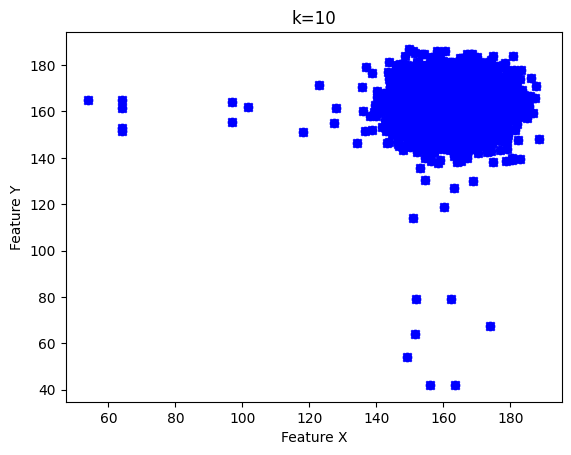

In [92]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(data, classes)


predicted_classes = neigh.predict(test_data)

class0_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 0]
class1_test = [test_data[i] for i in range(len(test_data)) if predicted_classes[i] == 1]


plt.scatter([x[0] for x in class0_test], [x[1] for x in class0_test], color='blue', label='Class 0')
plt.scatter([x[0] for x in class1_test], [x[1] for x in class1_test], color='red', label='Class 1')


plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 0], [x[1] for i,x in enumerate(data) if classes[i] == 0], marker='x', color='blue')
plt.scatter([x[0] for i,x in enumerate(data) if classes[i] == 1], [x[1] for i,x in enumerate(data) if classes[i] == 1], marker='x', color='red')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title("k=10")
plt.show()

In [93]:
y.dropna()

0       67.50
1       54.80
2       69.70
3       53.00
4       59.70
        ...  
6383    63.00
6384    62.30
6385    43.25
6386    55.50
6387    51.50
Name: weight, Length: 6388, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = [x.to_list() for x in train_test_split(X.dropna(), y.dropna())]

A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your 
kNN classifier. This is called hyper-parameter tuning.

In [95]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [97]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



param_grid = {'n_neighbors': np.arange(1, 21)} 

knn = KNeighborsClassifier()


random_search = RandomizedSearchCV(estimator=knn,param_distributions=param_grid,n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(data, classes)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)
best_k = random_search.best_params_['n_neighbors']


Best parameters: {'n_neighbors': 1}
Best score: 1.0
